In [1]:
import pandas as pd
import numpy as np
import tensorflow
#from tensorflow.keras.model import Sequential

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Flatten

In [3]:
#Problem Statment -->Weather Forecasting

#  D1  D2  D3  D4  D5  D6  D7  D8
#[110,225,500,222,444,555,111,444]
#Inorder Predict D9

#No of Time stamps --->Last or pervious three days data


#--->We need to consider Last or pervious three days data(Time 
# Stamps)Then we can analyze and forecast futher Results

#Data Perprocessing 

##     X              Y
##t1  t2  t3          t4

#110,225,500        222

#225,500,222        444

#500,222,444        555

#222,444,555        111

##---------
#----------
#-------

#555 111 444        218 -->D9


#Simple LSTM Rnn Model


#Predicting For the futher Ten days

#ploting






In [4]:
df = pd.read_csv('weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df = df.drop('Precip Type',axis='columns')

In [8]:
df = df.drop('Summary',axis='columns')

In [9]:
df = df.drop('Formatted Date',axis='columns')

In [10]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['Daily Summary'] = le.fit_transform(df['Daily Summary'])

In [15]:
df['Daily Summary'].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [16]:
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
x = df.iloc[:500,:-1]
print(x)
test = df.iloc[:500,8:]
print(test)

     Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0           9.472222                  7.388889      0.89            14.1197   
1           9.355556                  7.227778      0.86            14.2646   
2           9.377778                  9.377778      0.89             3.9284   
3           8.288889                  5.944444      0.83            14.1036   
4           8.755556                  6.977778      0.83            11.0446   
..               ...                       ...       ...                ...   
495        21.177778                 21.177778      0.43            19.8191   
496        21.227778                 21.227778      0.41            16.4703   
497        20.100000                 20.100000      0.45            13.7977   
498        19.027778                 19.027778      0.51             9.7888   
499        17.850000                 17.850000      0.59            14.0553   

     Wind Bearing (degrees)  Visibility (km)  Loud 

In [19]:
#RNN CAN ABLE LEARN ON NON- stationery

In [20]:
from sklearn.preprocessing import MinMaxScaler
df.head(),df.tail()

(   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
 0         9.472222                  7.388889      0.89            14.1197   
 1         9.355556                  7.227778      0.86            14.2646   
 2         9.377778                  9.377778      0.89             3.9284   
 3         8.288889                  5.944444      0.83            14.1036   
 4         8.755556                  6.977778      0.83            11.0446   
 
    Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
 0                   251.0          15.8263         0.0               1015.13   
 1                   259.0          15.8263         0.0               1015.63   
 2                   204.0          14.9569         0.0               1015.94   
 3                   269.0          15.8263         0.0               1016.41   
 4                   259.0          15.8263         0.0               1016.51   
 
    Daily Summary  
 0            197  
 1

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scale = scale.fit_transform(x)
test_scale = scale.fit_transform(test)

In [22]:
x_scale.shape

(500, 8)

In [23]:
len(test_scale)

500

In [24]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
n_input = 3
n_features = 8
generator = TimeseriesGenerator(x_scale,test_scale,length = n_input,batch_size=1)

In [26]:
x,y = generator[400]
print(x.shape)
print(y)

(1, 3, 8)
[[0.97159091]]


In [27]:
model = Sequential()

In [28]:
model.add(LSTM(100,input_shape=(n_input,n_features),activation='relu', return_sequences=True))

model.add(LSTM(30,activation='relu'))

model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 100)            43600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                15720     
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 59,351
Trainable params: 59,351
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit model
model.fit(generator,epochs=30)

Epoch 1/30
497/497 [==============================] - 3s 5ms/step - loss: 0.0792 - accuracy: 0.0724
Epoch 2/30
497/497 [==============================] - 3s 6ms/step - loss: 0.0812 - accuracy: 0.0724
Epoch 3/30
497/497 [==============================] - 2s 5ms/step - loss: 0.0781 - accuracy: 0.0704: 0s - loss: 0.0789 - accuracy
Epoch 4/30
497/497 [==============================] - 2s 4ms/step - loss: 0.0733 - accuracy: 0.0825
Epoch 5/30
497/497 [==============================] - 3s 6ms/step - loss: 0.0753 - accuracy: 0.0805
Epoch 6/30
497/497 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.0885
Epoch 7/30
497/497 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.0865
Epoch 8/30
497/497 [==============================] - 2s 4ms/step - loss: 0.0670 - accuracy: 0.0865
Epoch 9/30
497/497 [==============================] - 2s 4ms/step - loss: 0.0647 - accuracy: 0.0885
Epoch 10/30
497/497 [==============================] - 3s 5ms/step - l

In [33]:
import matplotlib.pyplot as plt

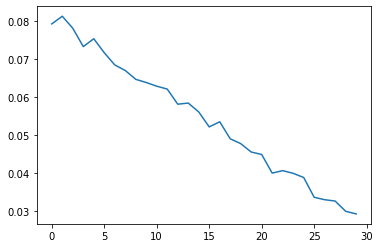

In [34]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
last_train_batch = x_scale[:500]
print(last_train_batch)
last_test_data = test_scale[:500]

[[0.2696717  0.25029488 0.83823529 ... 0.99690083 0.         0.66284404]
 [0.2642001  0.24345364 0.79411765 ... 0.99690083 0.         0.69151376]
 [0.26524231 0.33474876 0.83823529 ... 0.9411157  0.         0.70928899]
 ...
 [0.76810839 0.79004482 0.19117647 ... 0.71590909 0.         0.28555046]
 [0.71782178 0.74451522 0.27941176 ... 0.70454545 0.         0.26376147]
 [0.66258468 0.69450342 0.39705882 ... 0.70041322 0.         0.28038991]]


In [36]:
print(last_test_data)

[[0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

In [37]:
last_train_batch.shape

(500, 8)

In [38]:
n_input = 3
n_features = 8
generator = TimeseriesGenerator(last_train_batch,last_test_data,length = n_input,batch_size=1)

In [39]:
test_result = [ ]
for i in range(len(generator)):
    x,y = generator[i]
    test_result.append(model.predict(x))
test_result

[array([[0.58480567]], dtype=float32),
 array([[0.5389177]], dtype=float32),
 array([[0.46795458]], dtype=float32),
 array([[0.5060379]], dtype=float32),
 array([[0.5624114]], dtype=float32),
 array([[0.6214655]], dtype=float32),
 array([[0.6277487]], dtype=float32),
 array([[0.682634]], dtype=float32),
 array([[0.70818925]], dtype=float32),
 array([[0.75881433]], dtype=float32),
 array([[0.79939973]], dtype=float32),
 array([[0.7796427]], dtype=float32),
 array([[0.7645705]], dtype=float32),
 array([[0.80480087]], dtype=float32),
 array([[0.78251505]], dtype=float32),
 array([[0.78551567]], dtype=float32),
 array([[0.7822225]], dtype=float32),
 array([[0.71542716]], dtype=float32),
 array([[0.6895257]], dtype=float32),
 array([[0.6957663]], dtype=float32),
 array([[0.6177082]], dtype=float32),
 array([[0.5153893]], dtype=float32),
 array([[0.51748276]], dtype=float32),
 array([[0.4763331]], dtype=float32),
 array([[0.33677638]], dtype=float32),
 array([[0.4086921]], dtype=float32),
 a

In [40]:
x1 = np.array(test_result)
x1 = x1.reshape(-1,1)
x1

array([[ 5.84805667e-01],
       [ 5.38917720e-01],
       [ 4.67954576e-01],
       [ 5.06037891e-01],
       [ 5.62411427e-01],
       [ 6.21465504e-01],
       [ 6.27748728e-01],
       [ 6.82633996e-01],
       [ 7.08189249e-01],
       [ 7.58814335e-01],
       [ 7.99399734e-01],
       [ 7.79642701e-01],
       [ 7.64570475e-01],
       [ 8.04800868e-01],
       [ 7.82515049e-01],
       [ 7.85515666e-01],
       [ 7.82222509e-01],
       [ 7.15427160e-01],
       [ 6.89525723e-01],
       [ 6.95766330e-01],
       [ 6.17708206e-01],
       [ 5.15389323e-01],
       [ 5.17482758e-01],
       [ 4.76333112e-01],
       [ 3.36776376e-01],
       [ 4.08692092e-01],
       [ 4.47291821e-01],
       [ 4.86201853e-01],
       [ 5.11251926e-01],
       [ 5.53333163e-01],
       [ 6.14989877e-01],
       [ 5.98278642e-01],
       [ 5.10906816e-01],
       [ 4.61332202e-01],
       [ 4.15898681e-01],
       [ 4.02799785e-01],
       [ 4.23073262e-01],
       [ 4.50613648e-01],
       [ 4.4

In [41]:
print(last_test_data)

[[0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.93181818]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.44318182]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

In [42]:
print(test)

     Daily Summary
0              197
1              197
2              197
3              197
4              197
..             ...
495            111
496            111
497            111
498            111
499            111

[500 rows x 1 columns]


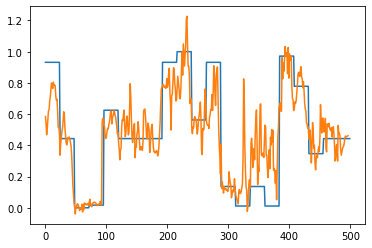

In [43]:
plt.plot(last_test_data)
plt.plot(x1)
